In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve
from sklearn import svm

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import VotingClassifier

In [72]:
from imblearn.over_sampling import SMOTE

In [73]:
df= pd.read_csv('H:\Machine_learning\Projects\dengue-data.csv')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   no.of.pt                            700 non-null    object 
 1   dengue.date_of_fever                700 non-null    object 
 2   dengue.residence                    700 non-null    object 
 3   dengue.days                         700 non-null    object 
 4   dengue.current_temp_in _F           700 non-null    float64
 5   dengue.wbc                          700 non-null    object 
 6   dengue.servere_headche              700 non-null    object 
 7   dengue.pain_behind_the_eyes         700 non-null    object 
 8   dengue.joint_muscle_aches           700 non-null    object 
 9   dengue.metallic_taste_in_the_mouth  700 non-null    object 
 10  dengue.appetite_loss                700 non-null    object 
 11  dengue.addominal_pain               700 non-n

In [42]:
df.columns

Index(['no.of.pt', 'dengue.date_of_fever', 'dengue.residence', 'dengue.days',
       'dengue.current_temp_in _F', 'dengue.wbc', 'dengue.servere_headche',
       'dengue.pain_behind_the_eyes', 'dengue.joint_muscle_aches',
       'dengue.metallic_taste_in_the_mouth', 'dengue.appetite_loss',
       'dengue.addominal_pain', 'dengue.nausea_vomiting', 'dengue.diarrhoea',
       'dengue.hemoglobin_in_gm/dl', 'dengue._hematocrit_in_percent',
       'dengue.platelet', 'dengue.dengue', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23'],
      dtype='object')

In [74]:
df = df.rename(columns={'dengue.date_of_fever': 'date_of_fever', 'dengue.residence' : 'residence', 'dengue.days': 'days', 'dengue.current_temp_in _F' :'current_temp(f)', 'dengue.wbc':'wbc', 'dengue.servere_headche': 'severe_headache', 'dengue.pain_behind_the_eyes': 'pain_behind_the_eyes', 'dengue.joint_muscle_aches': 'joint_muscle_aches', 'dengue.metallic_taste_in_the_mouth' : 'metallic_taste_of_mouth', 'dengue.appetite_loss' : 'appetite_loss', 'dengue.addominal_pain': 'abdominal_pain', 'dengue.nausea_vomiting' : 'nausea_vomiting', 'dengue.diarrhoea' :  'diarrhoea', 'dengue.hemoglobin_in_gm/dl' :'hemoglobin_in_gm_per_dl', 'dengue._hematocrit_in_percent':'hematocrit_in_percent', 'dengue.platelet':'platelet', 'dengue.dengue':'dengue'})

In [44]:
df.columns

Index(['no.of.pt', 'date_of_fever', 'residence', 'days', 'current_temp(f)',
       'wbc', 'severe_headache', 'pain_behind_the_eyes', 'joint_muscle_aches',
       'metallic_taste_of_mouth', 'appetite_loss', 'abdominal_pain',
       'nausea_vomiting', 'diarrhoea', 'hemoglobin_in_gm_per_dl',
       'hematocrit_in_percent', 'platelet', 'dengue', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [45]:
df.isnull().sum()

no.of.pt                     0
date_of_fever                0
residence                    0
days                         0
current_temp(f)              0
wbc                          0
severe_headache              0
pain_behind_the_eyes         0
joint_muscle_aches           0
metallic_taste_of_mouth      0
appetite_loss                0
abdominal_pain               0
nausea_vomiting              0
diarrhoea                    2
hemoglobin_in_gm_per_dl      0
hematocrit_in_percent        0
platelet                     0
dengue                       0
Unnamed: 18                700
Unnamed: 19                700
Unnamed: 20                700
Unnamed: 21                700
Unnamed: 22                700
Unnamed: 23                700
dtype: int64

In [46]:
df.head()

,no.of.pt,date_of_fever,residence,days,current_temp(f),wbc,severe_headache,pain_behind_the_eyes,joint_muscle_aches,metallic_taste_of_mouth,...,hemoglobin_in_gm_per_dl,hematocrit_in_percent,platelet,dengue,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,p-001,17-08-23,Kolabagan,2-days,102.0,7.3k,yes,yes,yes,yes,...,11.2,42,160,yes,NaN,NaN,NaN,NaN,NaN,NaN
1,p-002,17-02-23,Sabujbagh,2days,103.0,5.2k,yes,yes,yes,no,...,10.8,44,170,yes,NaN,NaN,NaN,NaN,NaN,NaN
2,p-003,04-07-23,Agargaon,3days,99.0,8.8k,yes,yes,yes,yes,...,11.0,41,130,yes,NaN,NaN,NaN,NaN,NaN,NaN
3,p-004,13-03-23,Bongshal,3days,99.5,4.2k,yes,yes,yes,no,...,11.6,45,120,yes,NaN,NaN,NaN,NaN,NaN,NaN
4,p-005,12-05-23,Hazaribagh,4days,98.0,10.1k,yes,yes,yes,no,...,9.8,39,110,yes,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
df['wbc'] = df['wbc'].str.replace('k', '').astype(float)

In [76]:
df ['dengue']= df['dengue'].str.replace('Yes', 'yes')
df ['dengue']= df['dengue'].str.replace('No', 'no')

In [77]:
df['severe_headache'] = df['severe_headache'].str.replace('Yes', 'yes')
df ['severe_headache']= df['severe_headache'].str.replace('No', 'no')

In [78]:
df['abdominal_pain'] = df['abdominal_pain'].str.replace('Yes', 'yes')
df ['abdominal_pain']= df['abdominal_pain'].str.replace('No', 'no')

In [79]:
df['metallic_taste_of_mouth'] = df['metallic_taste_of_mouth'].str.replace('Yes', 'yes')
df ['metallic_taste_of_mouth']= df['metallic_taste_of_mouth'].str.replace('No', 'no')

In [80]:
df['nausea_vomiting'] = df['nausea_vomiting'].str.replace('Yes', 'yes')
df ['nausea_vomiting']= df['nausea_vomiting'].str.replace('No', 'no')

In [81]:
df[('diarrhoea')] = df['diarrhoea'].str.replace('Yes', 'yes')
df ['diarrhoea']= df['diarrhoea'].str.replace('No', 'no')

In [82]:
df['pain_behind_the_eyes'] = df['pain_behind_the_eyes'].str.replace('Yes', 'yes')
df ['pain_behind_the_eyes']= df['pain_behind_the_eyes'].str.replace('No', 'no')

In [83]:
df['joint_muscle_aches'] = df['joint_muscle_aches'].str.replace('Yes', 'yes')
df ['joint_muscle_aches']= df['joint_muscle_aches'].str.replace('No', 'no')

In [84]:
df['appetite_loss'] = df['appetite_loss'].str.replace('Yes', 'yes')
df ['appetite_loss']= df['appetite_loss'].str.replace('No', 'no')

EDA 


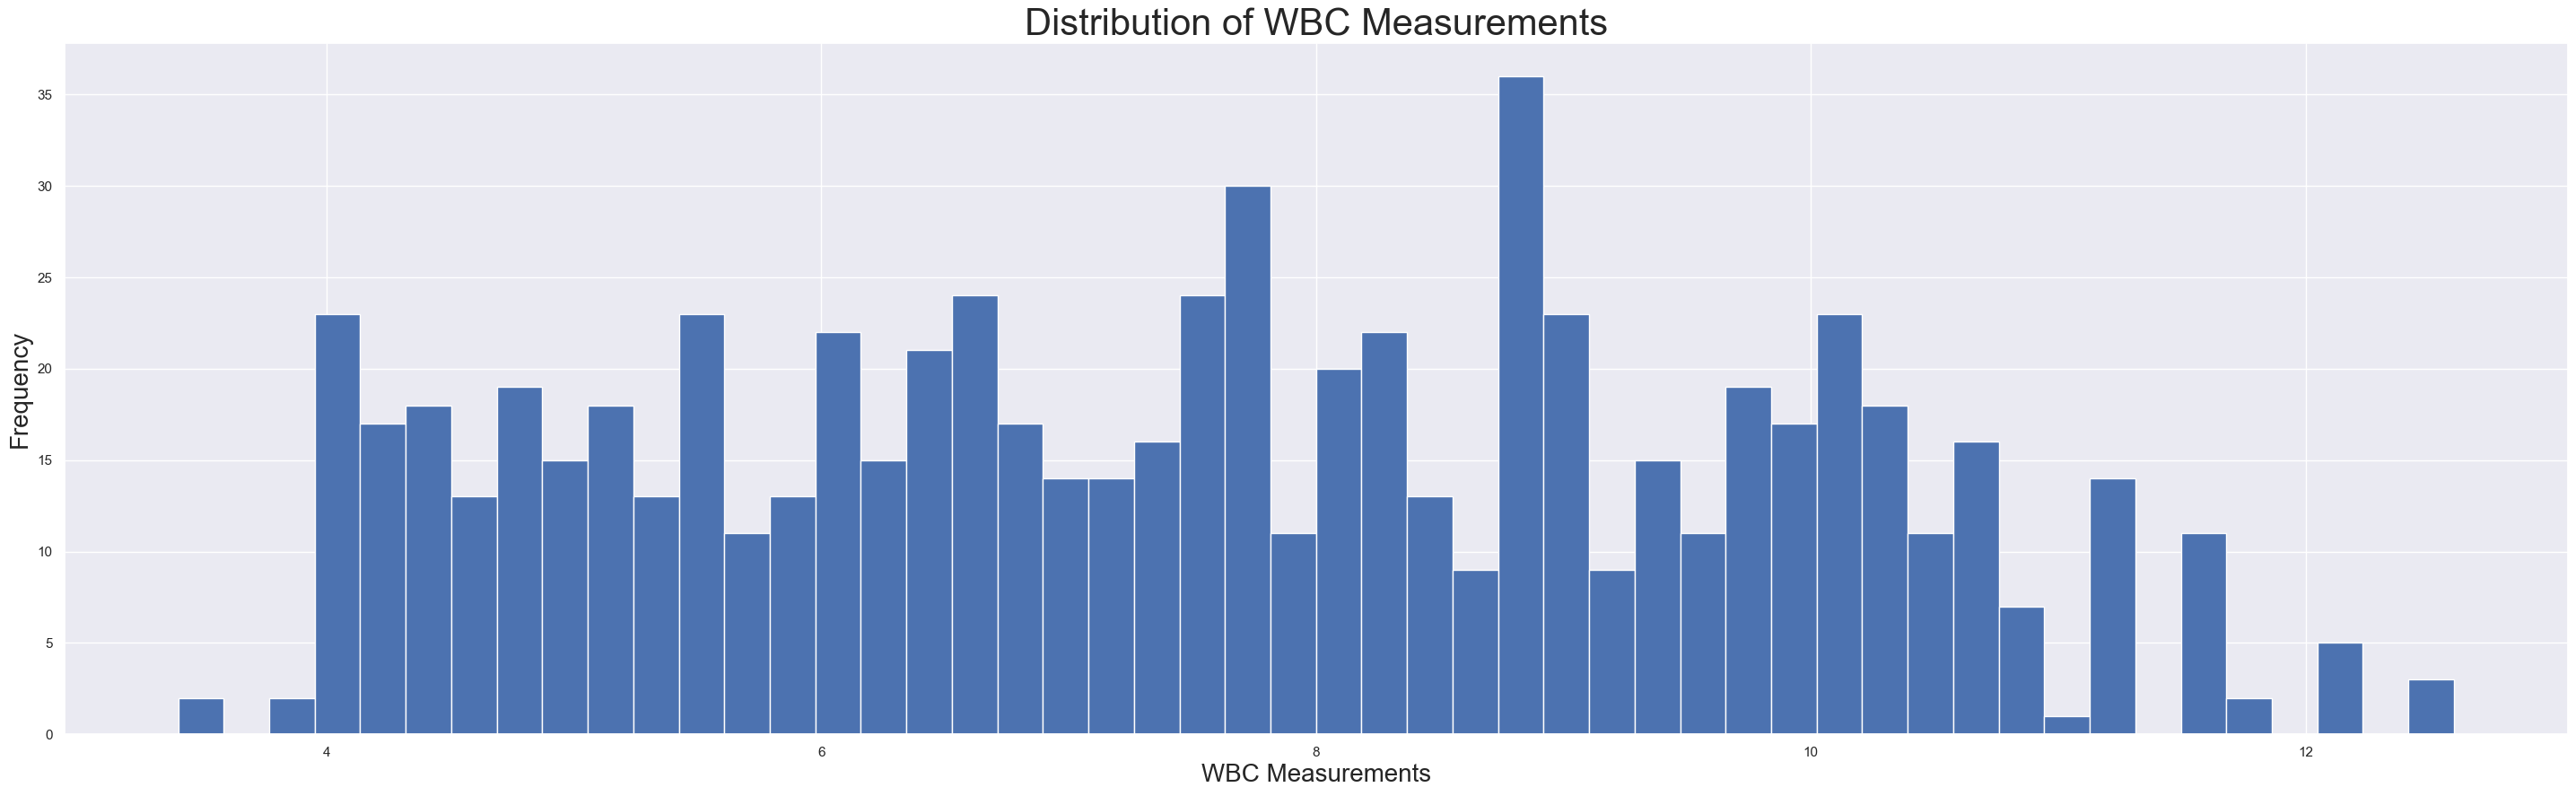

In [219]:
plt.figure(figsize=(36, 10))
plt.rcParams.update({'font.size': 12})
df["wbc"].hist(bins=50)
plt.title('Distribution of WBC Measurements', fontsize=30)
plt.xlabel('WBC Measurements', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.show()

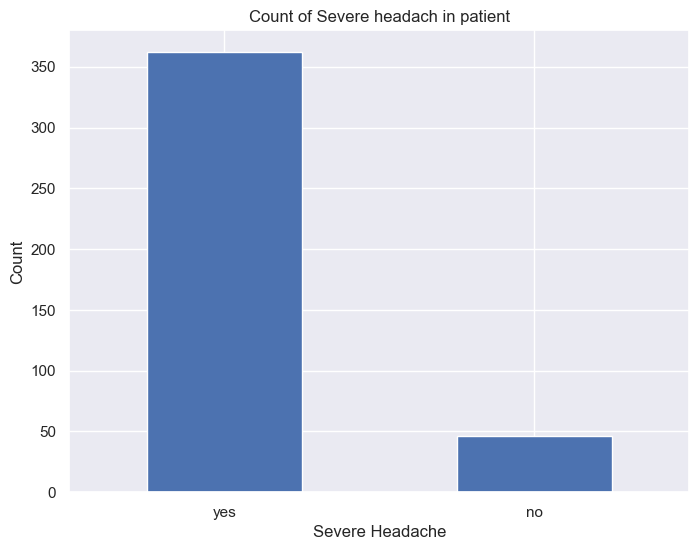

In [220]:
value_counts = df[df['dengue']=='yes']['severe_headache'].value_counts()

# Plot the counts in a bar chart
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', rot=0)
plt.xlabel('Severe Headache')
plt.ylabel('Count')
plt.title('Count of Severe headach in patient')
plt.show()

In [221]:
value_counts

severe_headache
yes    362
no      46
Name: count, dtype: int64

In [223]:
value_counts = df[df['dengue']=='yes']['metallic_taste_of_mouth'].value_counts()
value_counts

metallic_taste_of_mouth
yes    286
no     122
Name: count, dtype: int64

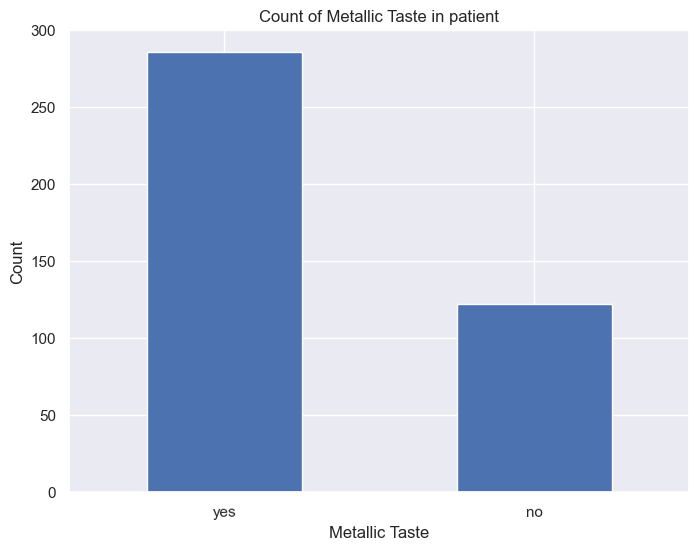

In [224]:
# Plot the counts in a bar chart
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', rot=1)
plt.xlabel('Metallic Taste')
plt.ylabel('Count')
plt.title('Count of Metallic Taste in patient')
plt.show()

In [225]:
value_counts = df[df['dengue']=='yes']['abdominal_pain'].value_counts()
value_counts

abdominal_pain
no     356
yes     52
Name: count, dtype: int64

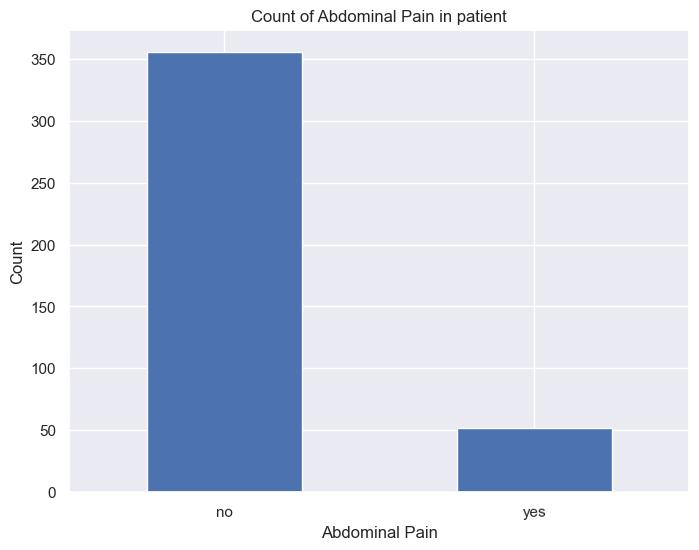

In [226]:
# Plot the counts in a bar chart
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', rot=1)
plt.xlabel('Abdominal Pain')
plt.ylabel('Count')
plt.title('Count of Abdominal Pain in patient')
plt.show()

In [227]:
value_counts = df[df['dengue']=='yes']['nausea_vomiting'].value_counts()
value_counts

nausea_vomiting
yes    218
no     190
Name: count, dtype: int64

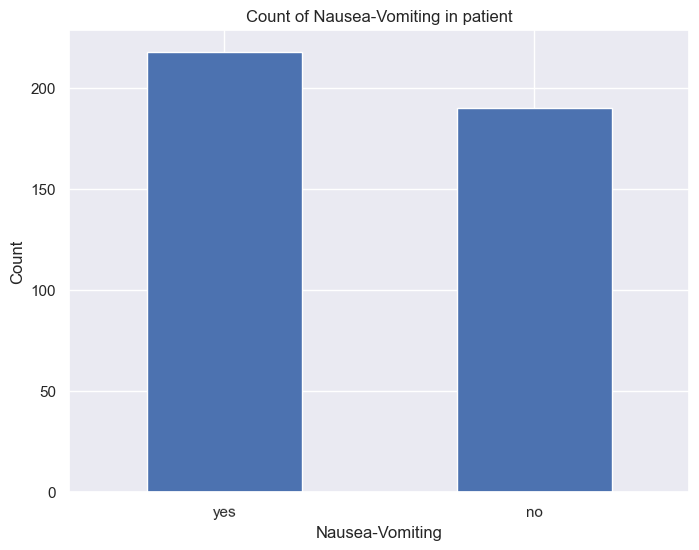

In [228]:
# Plot the counts in a bar chart
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', rot=1)
plt.xlabel('Nausea-Vomiting')
plt.ylabel('Count')
plt.title('Count of Nausea-Vomiting in patient')
plt.show()

In [57]:
value_counts = df['dengue'].value_counts()
value_counts

dengue
yes    408
no     292
Name: count, dtype: int64

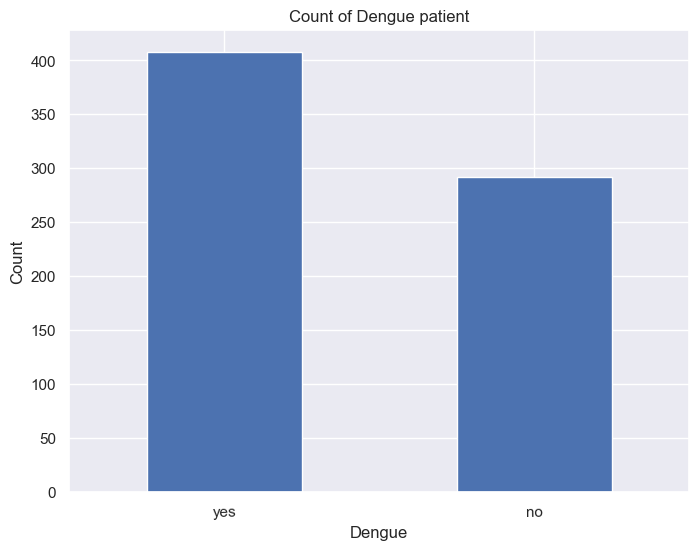

In [230]:
# Plot the counts in a bar chart
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', rot=1)
plt.xlabel('Dengue')
plt.ylabel('Count')
plt.title('Count of Dengue patient')
plt.show()

C:\Users\Admin\PycharmProjects\yolov5-fast\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\PycharmProjects\yolov5-fast\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\PycharmProjects\yolov5-fast\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


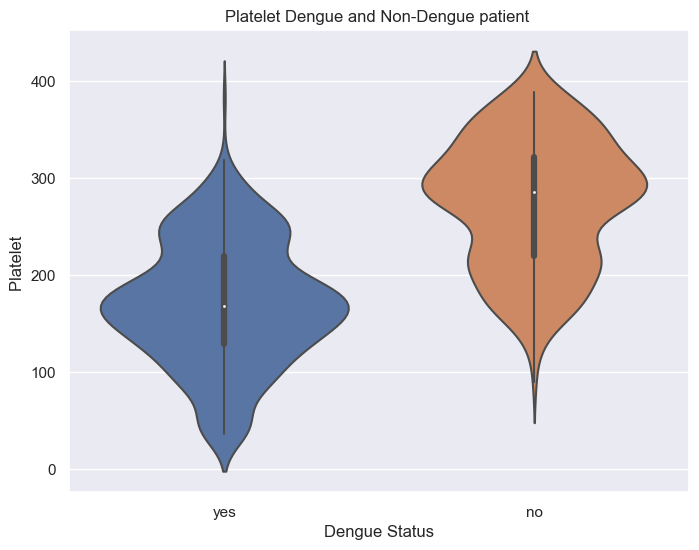

In [231]:
# Violin Plot
plt.figure(figsize=(8, 6))  # Set the figure size
sns.violinplot(x='dengue', y='platelet', data=df)
plt.title('Platelet Dengue and Non-Dengue patient ')
plt.xlabel('Dengue Status')
plt.ylabel('Platelet ')
plt.show()

C:\Users\Admin\PycharmProjects\yolov5-fast\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\PycharmProjects\yolov5-fast\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\PycharmProjects\yolov5-fast\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


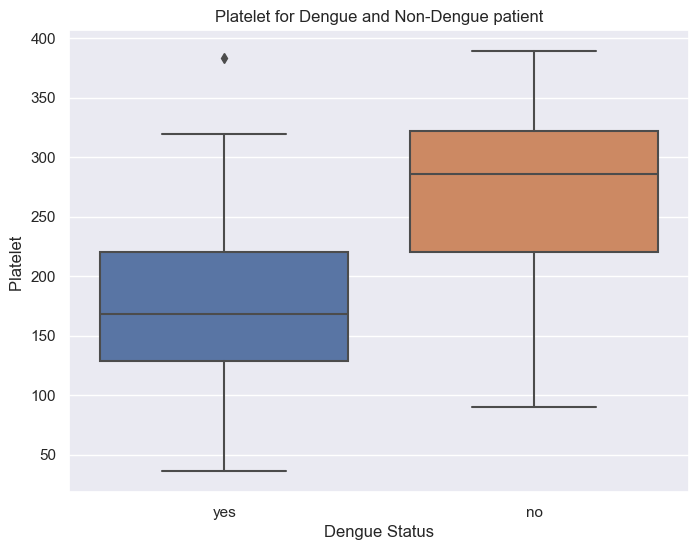

In [232]:
# box Plot
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x='dengue', y='platelet', data=df)
plt.title('Platelet for Dengue and Non-Dengue patient')
plt.xlabel('Dengue Status')
plt.ylabel('Platelet ')
plt.show()

In [ ]:
df 

C:\Users\Admin\PycharmProjects\yolov5-fast\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\PycharmProjects\yolov5-fast\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\PycharmProjects\yolov5-fast\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


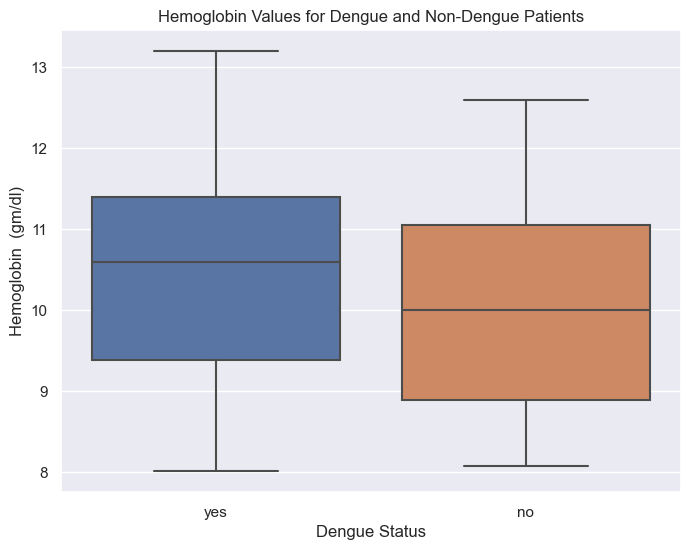

In [233]:
# box Plot
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x='dengue', y='hemoglobin_in_gm_per_dl', data=df)
plt.title('Hemoglobin Values for Dengue and Non-Dengue Patients')
plt.xlabel('Dengue Status')
plt.ylabel('Hemoglobin  (gm/dl)')
plt.show()

C:\Users\Admin\PycharmProjects\yolov5-fast\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\PycharmProjects\yolov5-fast\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\PycharmProjects\yolov5-fast\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


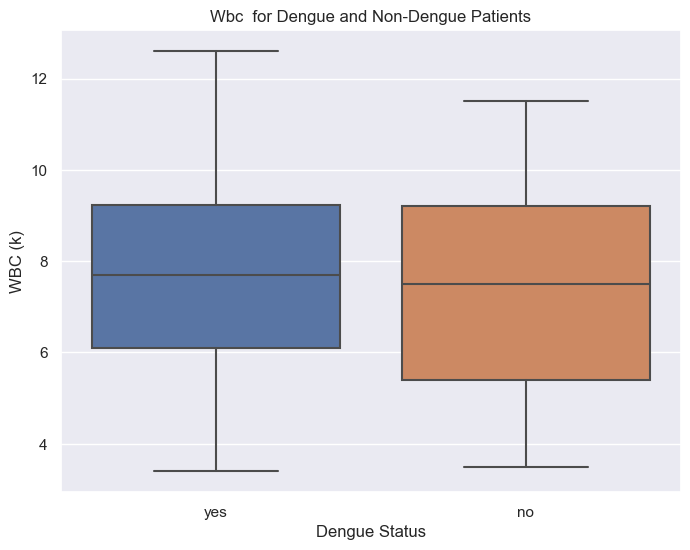

In [234]:
# box Plot
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x='dengue', y='wbc', data=df)
plt.title('Wbc  for Dengue and Non-Dengue Patients')
plt.xlabel('Dengue Status')
plt.ylabel('WBC (k)')
plt.show()

In [238]:
dengue_counts = df[df['dengue'] == 'yes']['residence'].value_counts()
dengue_counts

residence
Banani 2                          7
Azimpur                           6
Sherpur Govt. High School         6
Kakrail Bridge                    6
Elephant Road Mosque              6
                                 ..
Eskaton Central Mosque            1
Uttarkhan Govt. Primary School    1
Uttara Sector 15                  1
Doyaganj Bazar Jame Masjid        1
Doyaganj Bazar                    1
Name: count, Length: 215, dtype: int64

In [85]:
df=df.dropna(axis=1)
df

,no.of.pt,date_of_fever,residence,days,current_temp(f),wbc,severe_headache,pain_behind_the_eyes,joint_muscle_aches,metallic_taste_of_mouth,appetite_loss,abdominal_pain,nausea_vomiting,hemoglobin_in_gm_per_dl,hematocrit_in_percent,platelet,dengue
0,p-001,17-08-23,Kolabagan,2-days,102.0,7.3,yes,yes,yes,yes,yes,no,yes,11.20,42,160,yes
1,p-002,17-02-23,Sabujbagh,2days,103.0,5.2,yes,yes,yes,no,no,no,yes,10.80,44,170,yes
2,p-003,04-07-23,Agargaon,3days,99.0,8.8,yes,yes,yes,yes,yes,no,yes,11.00,41,130,yes
3,p-004,13-03-23,Bongshal,3days,99.5,4.2,yes,yes,yes,no,no,no,yes,11.60,45,120,yes
4,p-005,12-05-23,Hazaribagh,4days,98.0,10.1,yes,yes,yes,no,no,yes,yes,9.80,39,110,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,p-696,24-08-23,Wari Govt. High School,2 days,100.0,8.2,yes,yes,no,yes,yes,no,no,10.07,78,231,yes
696,p-697,04-05-23,Sabujbagh Jame Masjid,4 days,99.0,6.5,yes,yes,no,yes,yes,no,no,11.70,66,125,yes
697,p-698,01-01-23,Kotwali Jame Masjid,3 days,101.0,10.0,yes,no,no,yes,yes,no,no,8.93,37,330,no
698,p-699,26-04-23,Malitola Bazar,1 day,102.0,7.6,no,yes,no,yes,no,no,yes,9.73,82,87,yes


In [86]:
df.isna().sum()

no.of.pt                   0
date_of_fever              0
residence                  0
days                       0
current_temp(f)            0
wbc                        0
severe_headache            0
pain_behind_the_eyes       0
joint_muscle_aches         0
metallic_taste_of_mouth    0
appetite_loss              0
abdominal_pain             0
nausea_vomiting            0
hemoglobin_in_gm_per_dl    0
hematocrit_in_percent      0
platelet                   0
dengue                     0
dtype: int64

In [87]:
unneeded_columns = ['no.of.pt', 'date_of_fever', 'residence','days']
df = df.drop(unneeded_columns, axis=1)

In [88]:
categorical_columns = df.select_dtypes(include=['object','bool']).columns
categorical_columns

Index(['severe_headache', 'pain_behind_the_eyes', 'joint_muscle_aches',
       'metallic_taste_of_mouth', 'appetite_loss', 'abdominal_pain',
       'nausea_vomiting', 'dengue'],
      dtype='object')

In [21]:
import pickle
from sklearn.preprocessing import LabelEncoder

In [22]:
le_headache = LabelEncoder()
le_pain_eyes = LabelEncoder()
le_joint_muscle =LabelEncoder()
le_mettalic_taste = LabelEncoder()
le_appetite_loss = LabelEncoder()
le_abdominal_pain = LabelEncoder()
le_nausea = LabelEncoder()


In [23]:
df['severe_headache'] = le_headache.fit_transform(df['severe_headache'])
df['pain_behind_the_eyes'] = le_pain_eyes.fit_transform(df['pain_behind_the_eyes']) 
df['joint_muscle_aches'] = le_joint_muscle.fit_transform(df['joint_muscle_aches'])
df['metallic_taste_of_mouth'] = le_mettalic_taste.fit_transform(df['metallic_taste_of_mouth'])
df['appetite_loss'] = le_appetite_loss.fit_transform(df['appetite_loss'])
df['abdominal_pain'] = le_abdominal_pain.fit_transform(df['abdominal_pain'])
df['nausea_vomiting'] =le_nausea.fit_transform(df['nausea_vomiting'])

In [31]:
with open('nausea_vomiting_label_encoder.pkl', 'wb') as file:
    pickle.dump(le_nausea, file)

In [89]:
df.isna().sum()

current_temp(f)            0
wbc                        0
severe_headache            0
pain_behind_the_eyes       0
joint_muscle_aches         0
metallic_taste_of_mouth    0
appetite_loss              0
abdominal_pain             0
nausea_vomiting            0
hemoglobin_in_gm_per_dl    0
hematocrit_in_percent      0
platelet                   0
dengue                     0
dtype: int64

In [90]:
for i in categorical_columns:
    en = preprocessing.LabelEncoder()
    df[i]= en.fit_transform(df[i])

In [63]:
df

,current_temp(f),wbc,severe_headache,pain_behind_the_eyes,joint_muscle_aches,metallic_taste_of_mouth,appetite_loss,abdominal_pain,nausea_vomiting,diarrhoea,hemoglobin_in_gm_per_dl,hematocrit_in_percent,platelet,dengue,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,102.0,7.3,1,1,1,1,1,0,1,0,11.20,42,160,1,NaN,NaN,NaN,NaN,NaN,NaN
1,103.0,5.2,1,1,1,0,0,0,1,0,10.80,44,170,1,NaN,NaN,NaN,NaN,NaN,NaN
2,99.0,8.8,1,1,1,1,1,0,1,1,11.00,41,130,1,NaN,NaN,NaN,NaN,NaN,NaN
3,99.5,4.2,1,1,1,0,0,0,1,0,11.60,45,120,1,NaN,NaN,NaN,NaN,NaN,NaN
4,98.0,10.1,1,1,1,0,0,1,1,0,9.80,39,110,1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,100.0,8.2,1,1,0,1,1,0,0,0,10.07,78,231,1,NaN,NaN,NaN,NaN,NaN,NaN
696,99.0,6.5,1,1,0,1,1,0,0,1,11.70,66,125,1,NaN,NaN,NaN,NaN,NaN,NaN
697,101.0,10.0,1,0,0,1,1,0,0,1,8.93,37,330,0,NaN,NaN,NaN,NaN,NaN,NaN
698,102.0,7.6,0,1,0,1,0,0,1,1,9.73,82,87,1,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
cols_with_outliers = ['wbc','platelet','hemoglobin_in_gm_per_dl','nausea_vomiting','abdominal_pain','appetite_loss','severe_headache']

def remove_outliers(column):
    Q1 = column.quantile(.25)
    Q3 = column.quantile(.75)
    IQR = Q3 - Q1
    column = column[((Q1 - 1.5 * IQR) <= column) & (column  <= (Q3 + 1.5 * IQR))]
    return column

for col in cols_with_outliers:
    df[col] = remove_outliers(df[col])

In [94]:
df = df.dropna(axis=0).reset_index(drop=True)

In [95]:
y = df['dengue'].copy()
X = df.drop('dengue', axis=1)

In [256]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [96]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)

In [97]:
print("After Overampling, counts of label '0': {}".format(sum(y_sm == 0)))
print("After Oversampling, counts of label '1': {}".format(sum(y_sm == 1)))

After Overampling, counts of label '0': 318
After Oversampling, counts of label '1': 318


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [99]:
# Metrics dictionary
accuracy = dict()
precision = dict()
recall = dict()
f1 = dict()
fpr = dict()
tpr = dict()

In [100]:
lr = LogisticRegression(random_state=42, n_jobs=-1)
params = {"solver": ["newton-cg", "sag", "saga"]}
grid = GridSearchCV(lr, params, n_jobs=-1, verbose=5)
grid.fit(X_train, y_train)

print("Best parameters scores:")
print(grid.best_params_)
print("Train score:", grid.score(X_train, y_train))
print("Validation score:", grid.score(X_test, y_test))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters scores:
{'solver': 'newton-cg'}
Train score: 0.781496062992126
Validation score: 0.7421875


In [101]:
rfc = RandomForestClassifier(n_jobs=1, random_state=42)
parameters = [{"n_estimators": [50, 100, 200, 500], "max_depth": [5, 10, 15, 30]}]
grid = GridSearchCV(rfc, parameters, verbose=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters scores:")
print(grid.best_params_)
print("Train score:", grid.score(X_train, y_train))
print("Validation score:", grid.score(X_test, y_test))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters scores:
{'max_depth': 5, 'n_estimators': 500}
Train score: 0.860236220472441
Validation score: 0.796875


In [106]:
rfc = RandomForestClassifier(n_jobs=-1, random_state=42, n_estimators=500, max_depth=5)
rfc.fit(X_train, y_train)


print("Train score:", rfc.score(X_train, y_train))
print("Validation score:", rfc.score(X_test, y_test))

Train score: 0.860236220472441
Validation score: 0.796875


In [107]:
y_pred = rfc.predict(X_test)
accuracy["Random Forest"] = accuracy_score(y_test, y_pred)
f1["Random Forest"] = f1_score(y_test, y_pred, average="macro")

print(classification_report(y_train, rfc.predict(X_train)))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.78      0.85       252
           1       0.81      0.94      0.87       256

    accuracy                           0.86       508
   macro avg       0.87      0.86      0.86       508
weighted avg       0.87      0.86      0.86       508

              precision    recall  f1-score   support

           0       0.84      0.74      0.79        66
           1       0.76      0.85      0.80        62

    accuracy                           0.80       128
   macro avg       0.80      0.80      0.80       128
weighted avg       0.80      0.80      0.80       128


In [108]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
index = ["Actual Normal", "Actual Dengue"]
columns = ["Predicted Normal", "Predicted Dengue"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
conf_matrix

,Predicted Normal,Predicted Dengue
Actual Normal,49,17
Actual Dengue,9,53


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [109]:
knn= KNeighborsClassifier(n_jobs=-1)
parameters = [{"leaf_size": [50, 100], "weights": ["uniform", "distance"], "algorithm":["ball_tree", "kd_tree", "brute"]}]
grid = GridSearchCV(knn, parameters, verbose=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters scores:")
print(grid.best_params_)
print("Train score:", grid.score(X_train, y_train))
print("Validation score:", grid.score(X_test, y_test))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters scores:
{'algorithm': 'ball_tree', 'leaf_size': 100, 'weights': 'uniform'}
Train score: 0.8759842519685039
Validation score: 0.8359375


In [110]:
parameters = [{"kernel": ["poly", "sigmoid"],"C": [.5, .8, 1], "degree": [2, 3]}]
svc = svm.SVC(verbose=5, random_state=42)
grid = GridSearchCV(svc, parameters, verbose=5, n_jobs=-1)

grid.fit(X_train, y_train)

print("Best parameters scores:")
print(grid.best_params_)
print("Train score:", grid.score(X_train, y_train))
print("Validation score:", grid.score(X_test, y_test))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[LibSVM]Best parameters scores:
{'C': 0.8, 'degree': 3, 'kernel': 'poly'}
Train score: 0.7539370078740157
Validation score: 0.703125


In [111]:
# Voting Classifier with soft voting.
vot_soft = VotingClassifier(estimators= [('RFC', RandomForestClassifier()),('SVC',
                                         svm.SVC(kernel='poly',probability=True)),
                                         ('KNN',KNeighborsClassifier(leaf_size=60))], voting ='soft' )
params = {'RFC__n_estimators': [10, 100],
      'SVC__C': [2,3],
      'SVC__kernel':['linear','sigmoid','poly'],
      'KNN__algorithm':["kd_tree","ball_tree"]}
rsk = GridSearchCV(estimator=vot_soft, param_grid=params)

rsk.fit(X_train, y_train)

GridSearchCV(estimator=VotingClassifier(estimators=[('RFC',
                                                     RandomForestClassifier()),
                                                    ('SVC',
                                                     SVC(kernel='poly',
                                                         probability=True)),
                                                    ('KNN',
                                                     KNeighborsClassifier(leaf_size=60))],
                                        voting='soft'),
             param_grid={'KNN__algorithm': ['kd_tree', 'ball_tree'],
                         'RFC__n_estimators': [10, 100], 'SVC__C': [2, 3],
                         'SVC__kernel': ['linear', 'sigmoid', 'poly']})

In [112]:
print("Train score:", rsk.score(X_train, y_train))
print("Validation score:", rsk.score(X_test, y_test))

Train score: 0.9035433070866141
Validation score: 0.84375


In [113]:
# Voting Classifier with hard voting.
vot_hard = VotingClassifier(estimators= [('RFC', RandomForestClassifier()),('SVC',
                                         svm.SVC(kernel='poly',probability=True)),
                                         ('KNN',KNeighborsClassifier(leaf_size=60))], voting ='hard' )
params = {'RFC__n_estimators': [10, 100],
      'SVC__C': [2,3],
      'SVC__kernel':['sigmoid','poly'],
      'KNN__algorithm':["kd_tree","ball_tree"]}
rsk2 = GridSearchCV(estimator=vot_hard, param_grid=params)

rsk2.fit(X_train, y_train)

GridSearchCV(estimator=VotingClassifier(estimators=[('RFC',
                                                     RandomForestClassifier()),
                                                    ('SVC',
                                                     SVC(kernel='poly',
                                                         probability=True)),
                                                    ('KNN',
                                                     KNeighborsClassifier(leaf_size=60))]),
             param_grid={'KNN__algorithm': ['kd_tree', 'ball_tree'],
                         'RFC__n_estimators': [10, 100], 'SVC__C': [2, 3],
                         'SVC__kernel': ['sigmoid', 'poly']})

In [114]:
print("Train score:", rsk2.score(X_train, y_train))
print("Validation score:", rsk2.score(X_test, y_test))

Train score: 0.889763779527559
Validation score: 0.828125


In [115]:
y_pred = rsk2.predict(X_test)
accuracy["Random Forest"] = accuracy_score(y_test, y_pred)
f1["Random Forest"] = f1_score(y_test, y_pred, average="macro")

print(classification_report(y_train, rsk2.predict(X_train)))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       252
           1       0.89      0.89      0.89       256

    accuracy                           0.89       508
   macro avg       0.89      0.89      0.89       508
weighted avg       0.89      0.89      0.89       508

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        66
           1       0.81      0.84      0.83        62

    accuracy                           0.83       128
   macro avg       0.83      0.83      0.83       128
weighted avg       0.83      0.83      0.83       128


In [116]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
index = ["Actual Normal", "Actual Dengue"]
columns = ["Predicted Normal", "Predicted Dengue"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
conf_matrix

,Predicted Normal,Predicted Dengue
Actual Normal,54,12
Actual Dengue,10,52


In [119]:
with open('voting_classifier_model.pkl', 'wb') as model_file:
    pickle.dump(rsk, model_file)
